In [1]:
import sys
import os
sys.path.append("../")
sys.path.append("../..")
import numpy as np

In [2]:
from KETIPreDataIngestion.KETI_setting import influx_setting_KETI as ins
from KETIPreDataIngestion.data_influx import influx_Client
DBClient = influx_Client.influxClient(ins.CLUSTDataServer)
"""
#Test 1
db_name = 'farm_swine_vibes1'
ms_name = 'O2'
num = "2000"
column_name='O2/value'
input_data = DBClient.get_datafront_by_num(num, db_name, ms_name)[[column_name]]
"""

db_name = 'air_indoor_경로당'
ms_list = DBClient.measurement_list(db_name)
ms_name = ms_list[0]
num = "2000"
input_data = DBClient.get_datafront_by_num(num, db_name, ms_name) 

/home/keti/.conda/envs/torch/lib/python3.8/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (None) doesn't match a supported version!
  warnings.warn(


KeyError: 'host'

<AxesSubplot:xlabel='time'>

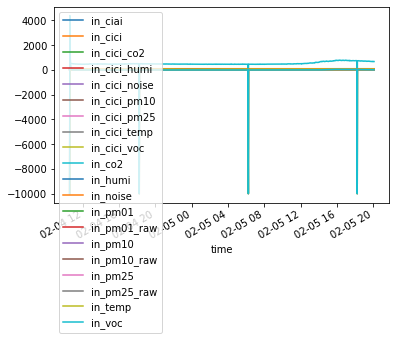

In [4]:
input_data.plot()

## Data Exploration

<AxesSubplot:>

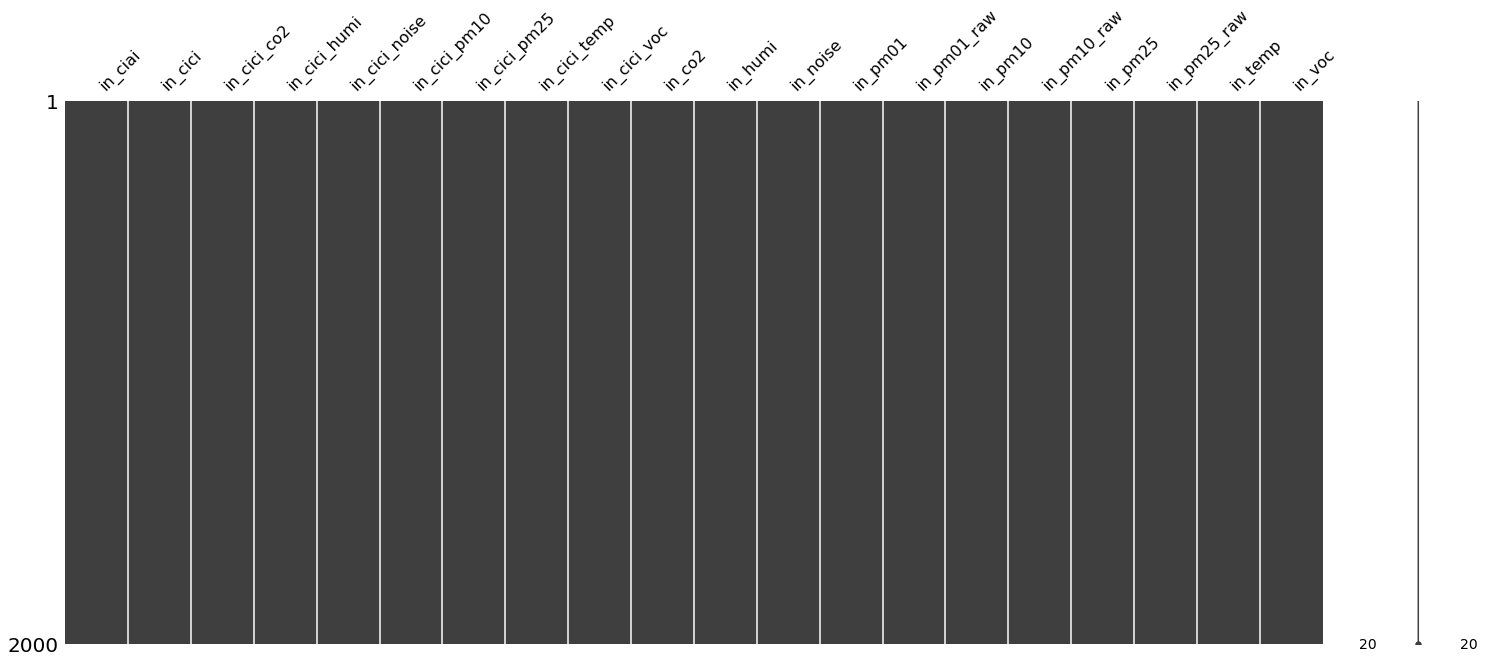

In [5]:
import missingno as msno
msno.matrix(input_data)
#input_data.isna().sum()

# clust.preprocessing.data_preprocessing test

## 1. Individual Module Test
### 1-1. Refine Test

In [6]:
# DataPreprocessing Class
data = input_data
from clust.preprocessing.data_preprocessing import DataPreprocessing

refine_param = {'removeDuplication': {'flag': True}, 'staticFrequency': {'flag': True, 'frequency': None}}
#refine_param2 = {'removeDuplication': {'flag': True}, 'staticFrequency': {'flag': True, 'frequency': "3H"}}

output = DataPreprocessing().get_refinedData(data, refine_param)

In [7]:
output.head()

,in_ciai,in_cici,in_cici_co2,in_cici_humi,in_cici_noise,in_cici_pm10,in_cici_pm25,in_cici_temp,in_cici_voc,in_co2,in_humi,in_noise,in_pm01,in_pm01_raw,in_pm10,in_pm10_raw,in_pm25,in_pm25_raw,in_temp,in_voc
time,,,,,,,,,,,,,,,,,,,,
2021-02-04 10:33:00+00:00,53.0,57.0,0.0,80.0,80.0,93.0,93.0,80.0,80.0,-9999.0,-9999.0,-9999.0,19.0,19.0,20.0,20.0,11.0,11.0,-9999.0,-9999.0
2021-02-04 10:34:00+00:00,67.0,60.0,88.0,54.0,69.0,94.0,93.0,49.0,31.0,552.0,22.0,61.0,19.0,19.0,19.0,19.0,11.0,11.0,13.8,4396.0
2021-02-04 10:35:00+00:00,69.0,65.0,87.0,50.0,67.0,94.0,93.0,53.0,36.0,597.0,20.0,62.0,18.0,18.0,18.0,18.0,10.0,10.0,14.2,3421.0
2021-02-04 10:36:00+00:00,73.0,66.0,88.0,47.0,79.0,94.0,93.0,62.0,45.0,540.0,19.0,56.0,17.0,17.0,17.0,17.0,10.0,10.0,14.8,1694.0
2021-02-04 10:37:00+00:00,76.0,69.0,89.0,47.0,80.0,94.0,93.0,70.0,51.0,521.0,19.0,54.0,17.0,17.0,18.0,18.0,10.0,10.0,15.3,975.0


in_ciai          13
in_cici          13
in_cici_co2      13
in_cici_humi     13
in_cici_noise    13
in_cici_pm10     13
in_cici_pm25     13
in_cici_temp     13
in_cici_voc      13
in_co2           13
in_humi          13
in_noise         13
in_pm01          13
in_pm01_raw      13
in_pm10          13
in_pm10_raw      13
in_pm25          13
in_pm25_raw      13
in_temp          13
in_voc           13
dtype: int64

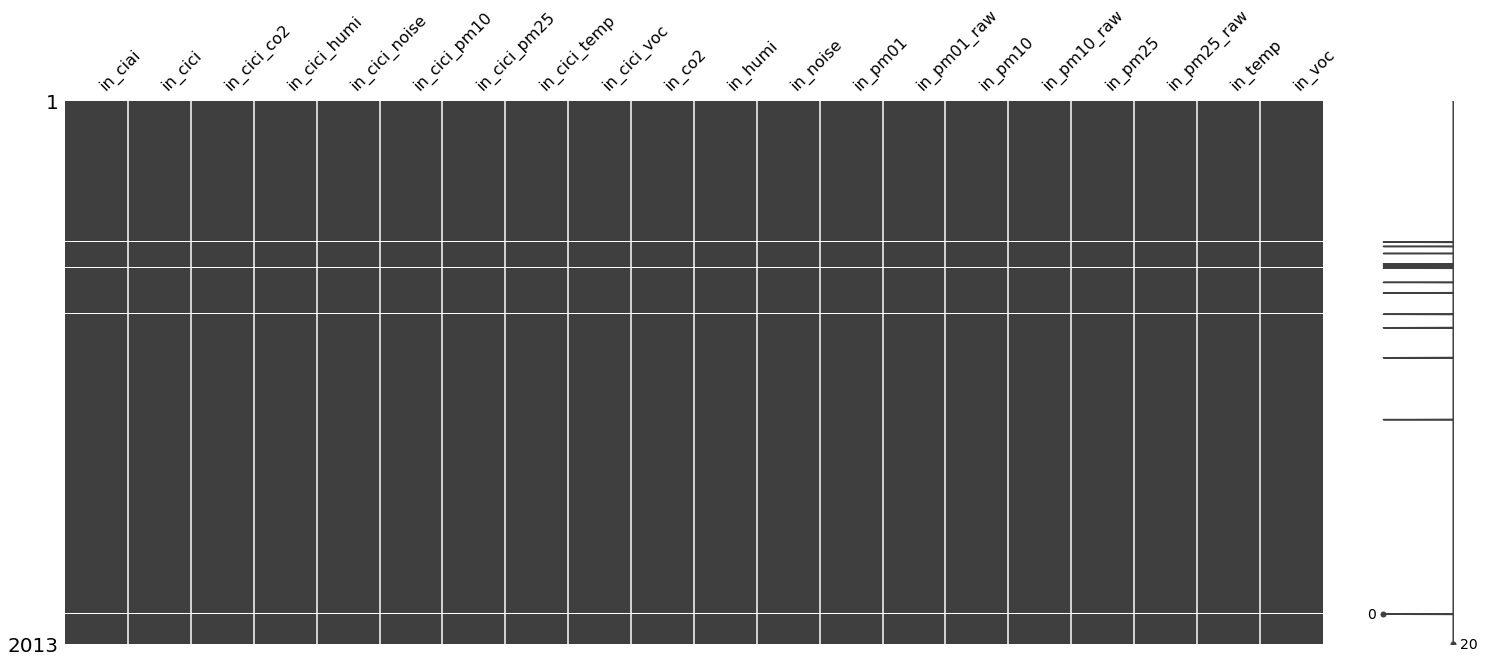

In [8]:
msno.matrix(output)
output.isna().sum()

### 1-2. Outlier to NaN Test

In [9]:
data = output
outlier_param = {'certainErrorToNaN': {'flag': True}, 'unCertainErrorToNaN': {'flag': True, 'param': {"SeasonalDecomposition":{"period":60*24, "limit":15}}},'data_type': 'air'}
datawithMoreCertainNaN, datawithMoreUnCertainNaN = DataPreprocessing().get_errorToNaNData(data, outlier_param)

getDataWithCertainNaN
getDataWithUncertainNaN
47.366 56.8392
48.262 57.9144
44.58425 53.501099999999994
24.6055 29.5266
40.621 48.745200000000004
47.64375 57.17249999999999
47.26875 56.7225
47.922 57.50639999999999
49.74625 59.6955
263.0566132264529 315.66793587174345
9.886022044088177 11.863226452905812
25.954408817635272 31.145290581162325
7.058 8.4696
7.058 8.4696
7.0775 8.492999999999999
7.0775 8.492999999999999
4.02625 4.8315
4.02625 4.8315
9.853940380761324 11.824728456913588
6.265531062124248 7.518637274549097


In [10]:
datawithMoreUnCertainNaN.head()

,in_ciai,in_cici,in_cici_co2,in_cici_humi,in_cici_noise,in_cici_pm10,in_cici_pm25,in_cici_temp,in_cici_voc,in_co2,in_humi,in_noise,in_pm01,in_pm01_raw,in_pm10,in_pm10_raw,in_pm25,in_pm25_raw,in_temp,in_voc
time,,,,,,,,,,,,,,,,,,,,
2021-02-04 10:33:00+00:00,53.0,57.0,0.0,80.0,80.0,93.0,93.0,80.0,80.0,NaN,NaN,NaN,19.0,19.0,20.0,20.0,11.0,11.0,NaN,NaN
2021-02-04 10:34:00+00:00,67.0,60.0,88.0,54.0,69.0,94.0,93.0,49.0,31.0,552.0,22.0,61.0,19.0,19.0,19.0,19.0,11.0,11.0,13.8,4396.0
2021-02-04 10:35:00+00:00,69.0,65.0,87.0,50.0,67.0,94.0,93.0,53.0,36.0,597.0,20.0,62.0,18.0,18.0,18.0,18.0,10.0,10.0,14.2,3421.0
2021-02-04 10:36:00+00:00,73.0,66.0,88.0,47.0,79.0,94.0,93.0,62.0,45.0,540.0,19.0,56.0,17.0,17.0,17.0,17.0,10.0,10.0,14.8,3421.0
2021-02-04 10:37:00+00:00,76.0,69.0,89.0,47.0,80.0,94.0,93.0,70.0,51.0,521.0,19.0,54.0,17.0,17.0,18.0,18.0,10.0,10.0,15.3,3421.0


in_ciai          13
in_cici          13
in_cici_co2      13
in_cici_humi     13
in_cici_noise    13
in_cici_pm10     13
in_cici_pm25     13
in_cici_temp     13
in_cici_voc      13
in_co2           17
in_humi          17
in_noise         17
in_pm01          13
in_pm01_raw      13
in_pm10          13
in_pm10_raw      13
in_pm25          13
in_pm25_raw      13
in_temp          17
in_voc           17
dtype: int64

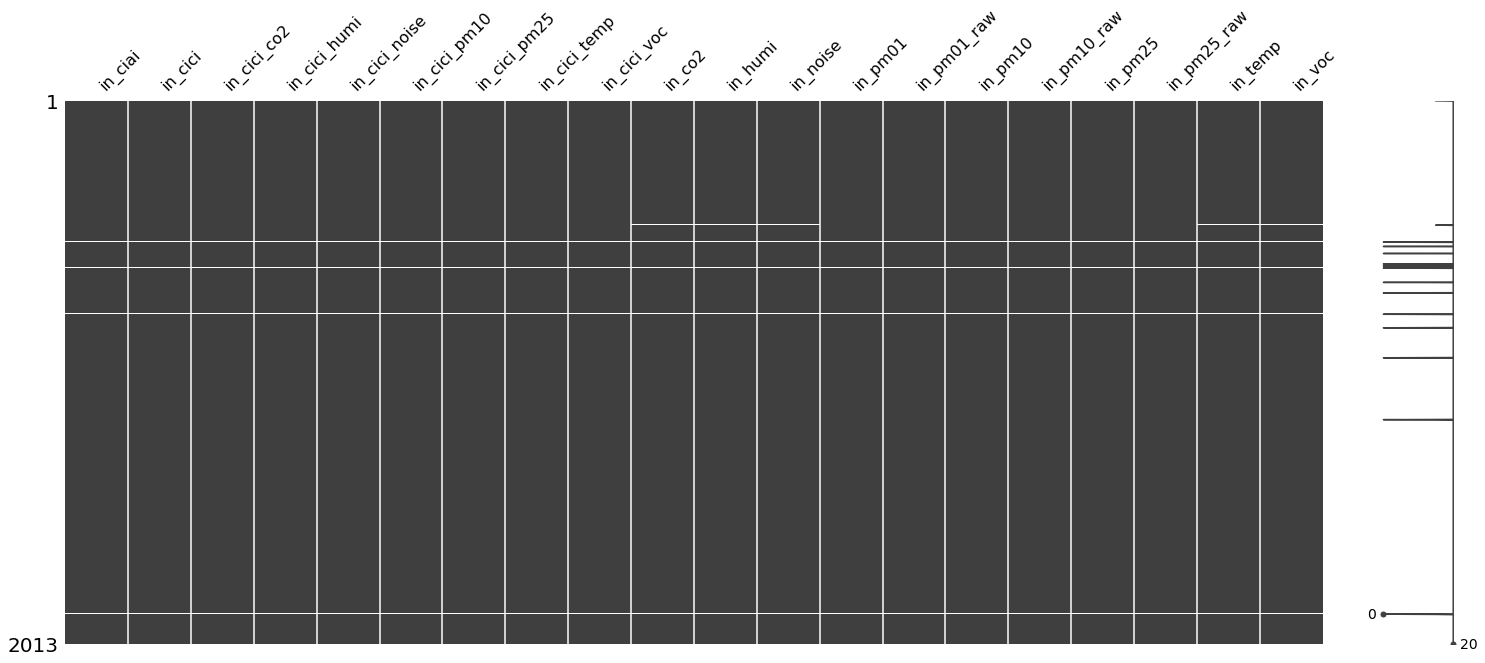

In [11]:
msno.matrix(datawithMoreUnCertainNaN)
datawithMoreUnCertainNaN.isna().sum()

### 1-3. Imputation Test

In [12]:
imputation_param = {
"serialImputation":{
    "flag":True,
    "imputation_method":[{"min":0,"max":1,"method":"linear", "parameter":{}}, 
                          #{"min":2,"max":3,"method":"brits", "parameter":{"trainDataPathList":[db_name, ms_name]}},
                            {"min":2,"max":100,"method":"mean", "parameter":{}}
    ],"totalNonNanRatio":20}
}
DataPreprocessing().get_imputedData(data, imputation_param)

after Drop NaN Data
===== NaN data Ratio summary ======
in_ciai          0.01
in_cici          0.01
in_cici_co2      0.01
in_cici_humi     0.01
in_cici_noise    0.01
in_cici_pm10     0.01
in_cici_pm25     0.01
in_cici_temp     0.01
in_cici_voc      0.01
in_co2           0.01
in_humi          0.01
in_noise         0.01
in_pm01          0.01
in_pm01_raw      0.01
in_pm10          0.01
in_pm10_raw      0.01
in_pm25          0.01
in_pm25_raw      0.01
in_temp          0.01
in_voc           0.01
dtype: float64
===== NaN data Ratio summary ======
in_ciai          0.0
in_cici          0.0
in_cici_co2      0.0
in_cici_humi     0.0
in_cici_noise    0.0
in_cici_pm10     0.0
in_cici_pm25     0.0
in_cici_temp     0.0
in_cici_voc      0.0
in_co2           0.0
in_humi          0.0
in_noise         0.0
in_pm01          0.0
in_pm01_raw      0.0
in_pm10          0.0
in_pm10_raw      0.0
in_pm25          0.0
in_pm25_raw      0.0
in_temp          0.0
in_voc           0.0
dtype: float64


,in_ciai,in_cici,in_cici_co2,in_cici_humi,in_cici_noise,in_cici_pm10,in_cici_pm25,in_cici_temp,in_cici_voc,in_co2,in_humi,in_noise,in_pm01,in_pm01_raw,in_pm10,in_pm10_raw,in_pm25,in_pm25_raw,in_temp,in_voc
time,,,,,,,,,,,,,,,,,,,,
2021-02-04 10:33:00+00:00,53.0,57.0,0.0,80.0,80.0,93.0,93.0,80.0,80.0,-9999.0,-9999.0,-9999.0,19.0,19.0,20.0,20.0,11.0,11.0,-9999.00,-9999.0
2021-02-04 10:34:00+00:00,67.0,60.0,88.0,54.0,69.0,94.0,93.0,49.0,31.0,552.0,22.0,61.0,19.0,19.0,19.0,19.0,11.0,11.0,13.80,4396.0
2021-02-04 10:35:00+00:00,69.0,65.0,87.0,50.0,67.0,94.0,93.0,53.0,36.0,597.0,20.0,62.0,18.0,18.0,18.0,18.0,10.0,10.0,14.20,3421.0
2021-02-04 10:36:00+00:00,73.0,66.0,88.0,47.0,79.0,94.0,93.0,62.0,45.0,540.0,19.0,56.0,17.0,17.0,17.0,17.0,10.0,10.0,14.80,1694.0
2021-02-04 10:37:00+00:00,76.0,69.0,89.0,47.0,80.0,94.0,93.0,70.0,51.0,521.0,19.0,54.0,17.0,17.0,18.0,18.0,10.0,10.0,15.30,975.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-05 20:01:00+00:00,94.0,97.0,86.0,52.0,82.0,96.0,95.0,97.0,99.0,688.0,21.0,51.0,13.0,13.0,13.0,13.0,7.0,7.0,19.89,15.0
2021-02-05 20:02:00+00:00,94.0,97.0,86.0,52.0,82.0,96.0,95.0,97.0,99.0,673.0,21.0,51.0,13.0,13.0,13.0,13.0,7.0,7.0,19.89,15.0
2021-02-05 20:03:00+00:00,94.0,97.0,86.0,52.0,81.0,96.0,95.0,97.0,99.0,674.0,21.0,52.0,13.0,13.0,13.0,13.0,7.0,7.0,19.89,14.0


## 2. Packaged Preprocessing process

In [13]:
from clust.preprocessing.data_preprocessing import packagedPartialProcessing
process_param = {'refine_param':refine_param, 'outlier_param':outlier_param, 'imputation_param':imputation_param}

result = packagedPartialProcessing(process_param).allPartialProcessing(input_data)

Refining-----End
getDataWithCertainNaN
getDataWithUncertainNaN
47.366 56.8392
48.262 57.9144
44.58425 53.501099999999994
24.6055 29.5266
40.621 48.745200000000004
47.64375 57.17249999999999
47.26875 56.7225
47.922 57.50639999999999
49.74625 59.6955
263.0566132264529 315.66793587174345
9.886022044088177 11.863226452905812
25.954408817635272 31.145290581162325
7.058 8.4696
7.058 8.4696
7.0775 8.492999999999999
7.0775 8.492999999999999
4.02625 4.8315
4.02625 4.8315
9.853940380761324 11.824728456913588
6.265531062124248 7.518637274549097
OutlierProcessing-----End
after Drop NaN Data
===== NaN data Ratio summary ======
in_ciai          0.01
in_cici          0.01
in_cici_co2      0.01
in_cici_humi     0.01
in_cici_noise    0.01
in_cici_pm10     0.01
in_cici_pm25     0.01
in_cici_temp     0.01
in_cici_voc      0.01
in_co2           0.01
in_humi          0.01
in_noise         0.01
in_pm01          0.01
in_pm01_raw      0.01
in_pm10          0.01
in_pm10_raw      0.01
in_pm25          0.01
in_p

In [16]:
result

{'original':                            in_ciai  in_cici  in_cici_co2  in_cici_humi  \
 time                                                                     
 2021-02-04 10:33:00+00:00     53.0     57.0          0.0          80.0   
 2021-02-04 10:34:00+00:00     67.0     60.0         88.0          54.0   
 2021-02-04 10:35:00+00:00     69.0     65.0         87.0          50.0   
 2021-02-04 10:36:00+00:00     73.0     66.0         88.0          47.0   
 2021-02-04 10:37:00+00:00     76.0     69.0         89.0          47.0   
 ...                            ...      ...          ...           ...   
 2021-02-05 20:01:00+00:00     94.0     97.0         86.0          52.0   
 2021-02-05 20:02:00+00:00     94.0     97.0         86.0          52.0   
 2021-02-05 20:03:00+00:00     94.0     97.0         86.0          52.0   
 2021-02-05 20:04:00+00:00     94.0     97.0         86.0          52.0   
 2021-02-05 20:05:00+00:00     94.0     97.0         86.0          52.0   
 
           

## 3. 결과 확인

key:  original Data Leangth: 2000 Data NaN Length: in_ciai          0
in_cici          0
in_cici_co2      0
in_cici_humi     0
in_cici_noise    0
in_cici_pm10     0
in_cici_pm25     0
in_cici_temp     0
in_cici_voc      0
in_co2           0
in_humi          0
in_noise         0
in_pm01          0
in_pm01_raw      0
in_pm10          0
in_pm10_raw      0
in_pm25          0
in_pm25_raw      0
in_temp          0
in_voc           0
dtype: int64


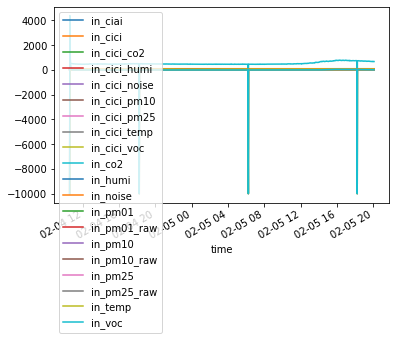

key:  refined_data Data Leangth: 2013 Data NaN Length: in_ciai          13
in_cici          13
in_cici_co2      13
in_cici_humi     13
in_cici_noise    13
in_cici_pm10     13
in_cici_pm25     13
in_cici_temp     13
in_cici_voc      13
in_co2           13
in_humi          13
in_noise         13
in_pm01          13
in_pm01_raw      13
in_pm10          13
in_pm10_raw      13
in_pm25          13
in_pm25_raw      13
in_temp          13
in_voc           13
dtype: int64


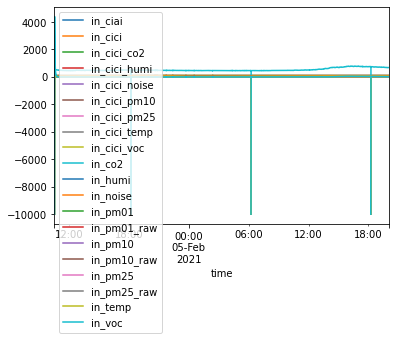

key:  datawithMoreCertainNaN Data Leangth: 2013 Data NaN Length: in_ciai          13
in_cici          13
in_cici_co2      13
in_cici_humi     13
in_cici_noise    13
in_cici_pm10     13
in_cici_pm25     13
in_cici_temp     13
in_cici_voc      13
in_co2           17
in_humi          17
in_noise         17
in_pm01          13
in_pm01_raw      13
in_pm10          13
in_pm10_raw      13
in_pm25          13
in_pm25_raw      13
in_temp          17
in_voc           17
dtype: int64


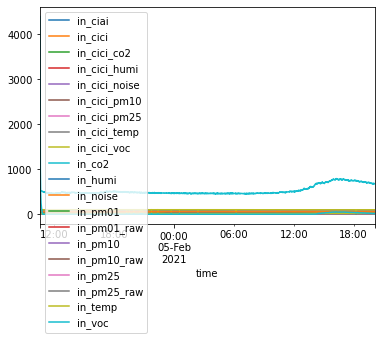

key:  datawithMoreUnCertainNaN Data Leangth: 2013 Data NaN Length: in_ciai          13
in_cici          13
in_cici_co2      13
in_cici_humi     13
in_cici_noise    13
in_cici_pm10     13
in_cici_pm25     13
in_cici_temp     13
in_cici_voc      13
in_co2           17
in_humi          17
in_noise         17
in_pm01          13
in_pm01_raw      13
in_pm10          13
in_pm10_raw      13
in_pm25          13
in_pm25_raw      13
in_temp          17
in_voc           17
dtype: int64


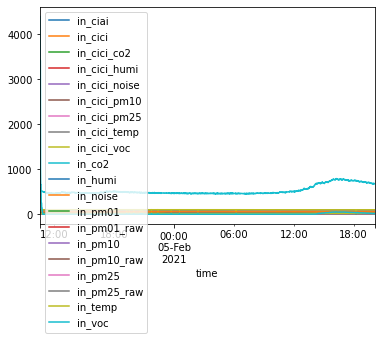

key:  imputed_data Data Leangth: 2013 Data NaN Length: in_ciai          0
in_cici          0
in_cici_co2      0
in_cici_humi     0
in_cici_noise    0
in_cici_pm10     0
in_cici_pm25     0
in_cici_temp     0
in_cici_voc      0
in_co2           0
in_humi          0
in_noise         0
in_pm01          0
in_pm01_raw      0
in_pm10          0
in_pm10_raw      0
in_pm25          0
in_pm25_raw      0
in_temp          0
in_voc           0
dtype: int64


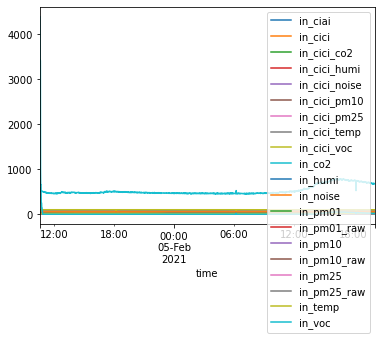

In [14]:
# Check each result
import matplotlib.pyplot as plt
for key in result:
    temp = result[key]
    print("key: ", key, "Data Leangth:", len(temp), "Data NaN Length:", temp.isna().sum())
    temp.plot()
    plt.show()

<AxesSubplot:xlabel='time'>

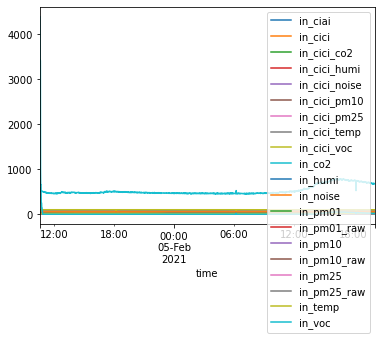

In [15]:
result['imputed_data'].plot()